In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim as gen
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [72]:
questions = pd.read_csv('questions.csv')
tag_ques = pd.read_csv('tag_questions.csv')
tag_name = pd.read_csv('tags.csv')
tag_users = pd.read_csv('tag_users.csv')
answers = pd.read_csv('answers.csv')
professionals = pd.read_csv('professionals.csv')

In [73]:
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [74]:
questions['questions_id'].nunique()

23931

In [75]:
print(tag_ques['tag_questions_tag_id'].nunique()) 
print(tag_ques['tag_questions_question_id'].nunique()) 
tag_ques.head() # 76553 rows

7091
23288


,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [76]:
print(tag_name['tags_tag_name'].nunique())
tag_name.head()

16268


,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [77]:
#merge tag_ques with tag_name
tag = tag_ques.merge(tag_name, how = 'left', 
                     left_on = 'tag_questions_tag_id', 
                     right_on = 'tags_tag_id',
                    validate="many_to_one")
# tag.head()
tag2 = tag.drop(['tag_questions_tag_id','tags_tag_id'],axis=1)
tag2.head()
# print(tag2['tag_questions_question_id'].nunique())

,tag_questions_question_id,tags_tag_name
0,cb43ebee01364c68ac61d347a393ae39,minor
1,47f55e85ce944242a5a347ab85a8ffb4,minor
2,ccc30a033a0f4dfdb2eb987012f25792,minor
3,e30b274e48d741f7bf50eb5e7171a3c0,minor
4,3d22742052df4989b311b4195cbb0f1a,minor


In [78]:
# merge questions with tag2: one question has multiple tags
questions_tags = questions.merge(tag2, how='left',
                                left_on = 'questions_id',
                                right_on = 'tag_questions_question_id',
                                validate="one_to_many")  # this last option to check duplicates
questions_tags.head(100)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tag_questions_question_id,tags_tag_name
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,332a511f1569444485cf7a7a556a5e54,lecture
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,332a511f1569444485cf7a7a556a5e54,college
2,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,332a511f1569444485cf7a7a556a5e54,professor
3,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,eb80205482e4424cad8f16bc25aa2d9c,military
4,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,eb80205482e4424cad8f16bc25aa2d9c,army
5,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,4ec31632938a40b98909416bdd0decff,overseas
6,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,4ec31632938a40b98909416bdd0decff,working-abroad
7,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,2f6a9a99d9b24e5baa50d40d0ba50a75,networking
8,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,2f6a9a99d9b24e5baa50d40d0ba50a75,business
9,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,5af8880460c141dbb02971a1a8369529,scholarships


In [79]:
# collapes the above df such that one multiple tags of the same question
# is in one case
# questions26 would be the main df of analysis
question_tags_tag = questions_tags[['questions_id','tags_tag_name']]
question_tags_tag =question_tags_tag.fillna('')
# collapes tags by questions_id
question_tags_tag = question_tags_tag.pivot_table(values='tags_tag_name',
                            index='questions_id',
                            aggfunc=lambda x: " ".join(x))
questions26 = questions.merge(question_tags_tag, how ='left', on = 'questions_id')
questions26.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,lecture college professor
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,military army
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,overseas working-abroad
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,networking business
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,scholarships highschoolsenior college firstgen...


In [80]:
print(tag_users['tag_users_user_id'].nunique())
print(tag_users['tag_users_tag_id'].nunique())
tag_users.head()  # 136663 rows, so one user may have multiple tags

30202
11911


,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [81]:
# a lot of duplicates in rows
tag_users[tag_users['tag_users_user_id']=='0c673e046d824ec0ad0ebe012a0673e4']

,tag_users_tag_id,tag_users_user_id
258,18070,0c673e046d824ec0ad0ebe012a0673e4
259,18547,0c673e046d824ec0ad0ebe012a0673e4
284,18070,0c673e046d824ec0ad0ebe012a0673e4
285,18547,0c673e046d824ec0ad0ebe012a0673e4
321,18070,0c673e046d824ec0ad0ebe012a0673e4
322,18547,0c673e046d824ec0ad0ebe012a0673e4
351,18070,0c673e046d824ec0ad0ebe012a0673e4
352,18547,0c673e046d824ec0ad0ebe012a0673e4
377,18070,0c673e046d824ec0ad0ebe012a0673e4
378,18547,0c673e046d824ec0ad0ebe012a0673e4


In [82]:
# merge tag_users with rag_name
tag_users_name = tag_users.merge(tag_name, how = 'left',
                                left_on = 'tag_users_tag_id',
                                right_on = 'tags_tag_id')  #136663 row
tag_users_name = tag_users_name.drop(['tag_users_tag_id','tags_tag_id'], axis = 1)
tag_users_name.head()

,tag_users_user_id,tags_tag_name
0,c72ab38e073246e88da7e9a4ec7a4472,computer-software
1,8db519781ec24f2e8bdc67c2ac53f614,programming
2,042d2184ee3e4e548fc3589baaa69caf,running
3,c660bd0dc1b34224be78a58aa5a84a63,life-coach
4,8ce1dca4e94240239e4385ed22ef43ce,art


In [83]:
# there are duplicate rows in the dataframe
tag_users_name[tag_users_name['tag_users_user_id']=='0c673e046d824ec0ad0ebe012a0673e4']

,tag_users_user_id,tags_tag_name
258,0c673e046d824ec0ad0ebe012a0673e4,consulting
259,0c673e046d824ec0ad0ebe012a0673e4,education
284,0c673e046d824ec0ad0ebe012a0673e4,consulting
285,0c673e046d824ec0ad0ebe012a0673e4,education
321,0c673e046d824ec0ad0ebe012a0673e4,consulting
322,0c673e046d824ec0ad0ebe012a0673e4,education
351,0c673e046d824ec0ad0ebe012a0673e4,consulting
352,0c673e046d824ec0ad0ebe012a0673e4,education
377,0c673e046d824ec0ad0ebe012a0673e4,consulting
378,0c673e046d824ec0ad0ebe012a0673e4,education


In [84]:
# collapes tag names by user_id, such that multiple tags of the same user
# is in one case
tag_users_name = tag_users_name.pivot_table(index = 'tag_users_user_id',
                                           values = 'tags_tag_name',
                                           aggfunc=lambda x: " ".join(x))
tag_users_name.head()  # 32202 rows

,tags_tag_name
tag_users_user_id,
00009a0f9bda43eba47104e9ac62aff5,digital-media script-writing content-creation
000196ef8db54b9a86ae70ad31745d04,accounting
0008138be908438e8944b21f7f57f2c1,real-estate
000d4635e5da41e3bfd83677ee11dda4,university information-technology college
000e2b5714444d79a672bf927905135c,financial-services


In [85]:
professionals_tag = professionals.merge(tag_users_name, how = 'left', 
                                          left_on = 'professionals_id',
                                          right_on = 'tag_users_user_id',
                                         validate = 'one_to_one')
professionals_tag = professionals_tag.fillna('')
professionals_tag.info()  # 28152 entris

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28152 entries, 0 to 28151
Data columns (total 6 columns):
professionals_id             28152 non-null object
professionals_location       28152 non-null object
professionals_industry       28152 non-null object
professionals_headline       28152 non-null object
professionals_date_joined    28152 non-null object
tags_tag_name                28152 non-null object
dtypes: object(6)
memory usage: 1.5+ MB


In [86]:

answers = answers.drop('answers_body',axis = 1)
answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000


In [87]:
print(True in np.array(answers.duplicated()))  # answers does not have duplicate rows
print(answers['answers_question_id'].nunique())
print(answers['answers_author_id'].nunique())
answers.info()

False
23110
10169
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 4 columns):
answers_id             51123 non-null object
answers_author_id      51123 non-null object
answers_question_id    51123 non-null object
answers_date_added     51123 non-null object
dtypes: object(4)
memory usage: 1.6+ MB


In [88]:
# merge professionals with answers so that you know which question is answered by
# which professional
prof_ans = professionals_tag.merge(answers, how = 'left', 
                                      left_on = 'professionals_id',
                                      right_on = 'answers_author_id',
                                      validate = 'one_to_many')

prof_ans.info()  # and no duplicate rows
# the reason that you have more entries than the answer dataset is bc
# some of the entries is in the left but not in the right
print(prof_ans['answers_id'].nunique()) # you lost 51123 - 50106 answers_id: why?
print(prof_ans['professionals_id'].nunique())  # you have all the professionals_id

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68191 entries, 0 to 68190
Data columns (total 10 columns):
professionals_id             68191 non-null object
professionals_location       68191 non-null object
professionals_industry       68191 non-null object
professionals_headline       68191 non-null object
professionals_date_joined    68191 non-null object
tags_tag_name                68191 non-null object
answers_id                   50106 non-null object
answers_author_id            50106 non-null object
answers_question_id          50106 non-null object
answers_date_added           50106 non-null object
dtypes: object(10)
memory usage: 5.7+ MB
50106
28152


In [89]:
# # the sequence to which you merge the dataset and whether left or right matters
# pro_ans_question = prof_ans.merge(questions, how = 'left',
#                                    left_on = 'answers_question_id',
#                                    right_on = 'questions_id',                                
#                                    validate = 'many_to_one')
# pro_ans_question.info(100)  # 68191 entries and only 50106 of which is answered

In [90]:
# create bag of words of questions
question_bow = questions26['questions_title'] + ' ' + questions26['questions_body'] + ' ' \
                    + questions26['tags_tag_name'].fillna(' ')
question_bow.head()  # 23930 rows   

0    Teacher   career   question What  is  a  maths...
1    I want to become an army officer. What can I d...
2    Will going abroad for your first job increase ...
3    To become a specialist in business  management...
4    Are there any scholarships out there for stude...
dtype: object

In [91]:
# define the vectorizer: we use tfidf vectorizer
stop = stopwords.words('english')  # get all the stop words, about 600 something
vec = TfidfVectorizer(min_df = 5, stop_words = stop)
# transform the question_bow
question_bow_vec = vec.fit_transform(question_bow)
print(question_bow_vec.shape)
# vec.get_feature_names()  # so we have 23931 documents and 5391 features

(23931, 5391)


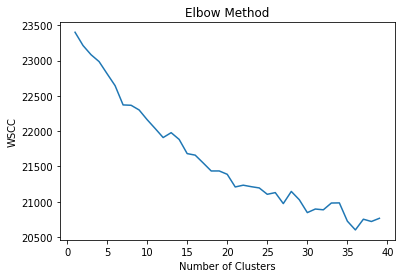

45.82262086868286


In [23]:
# Use Kmean cluster to arrange features into k clusters
start = time.time()
from sklearn.cluster import MiniBatchKMeans
n = 40
wcss = []
for i in range(1,n):
    minibmeans = MiniBatchKMeans(n_clusters = i, init = 'k-means++', max_iter = 300, \
                    n_init = 20, random_state = 0)
    minibmeans.fit(question_bow_vec)
    wcss.append(minibmeans.inertia_)
plt.plot(range(1,n),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSCC')
plt.show()
end = time.time()
print(end-start)  # display runtime: 45.82262086868286 sec


In [25]:
# fit the minibatch model with k = 20
start_fit = time.time()
minibmeans26 = MiniBatchKMeans(n_clusters = 20, init = 'k-means++', max_iter = 300, \
                    n_init =20, random_state = 0)
minibmeans26.fit(question_bow_vec)
end_fit = time.time()
# print(end_fit - start_fit)  # 2.3041317462921143 sec

In [96]:
#start_pred = time.time()
predict = minibmeans26.fit_predict(question_bow_vec)
# label the questions with cluster id
questions26['cluster_id'] = predict
questions26.head(10)
questions26['cluster_id'].value_counts()
#end_pred = time.time()
# print(end_pred - start_pred)  # 2.31313 sec



9     10162
2      2649
17     1110
3      1101
12     1023
14      849
4       845
10      765
15      724
13      657
8       635
7       595
5       513
0       506
19      441
18      386
11      360
16      331
6       278
1         1
Name: cluster_id, dtype: int64

In [ ]:
# concat the two pd series question_bow with cluster_id into a dataframe
question_bow_cluster = pd.concat([question_bow,pd.Series(data = predict)], \
                                 keys=['question_bow','cluster_id'], axis=1)
question_bow_cluster.head(10)

In [36]:
type(pd.Series(data = predict))

pandas.core.series.Series

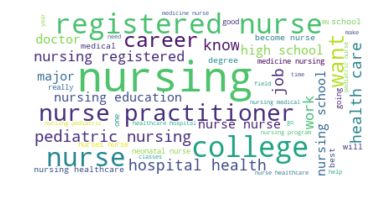

In [66]:
# dran wordcloud for each cluster
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# generate the text for wordcloud: combining rows of question_bow into one row
text = question_bow_cluster.pivot_table(values='question_bow',
                            index='cluster_id',
                            aggfunc=lambda x: " ".join(x)).reset_index()
text26 = text.loc[text['cluster_id']==14, 'question_bow'].item()
# generate the wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white" \
                     ).generate(text26)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("cluster14.png")

In [94]:
# build a recommendation engine: assume data is given as a question dataframe
# # and we are querying a specific row of question info in the dataframe
# query_bow = questions26.iloc[5]['questions_title'] + ' '\
#             + questions26.iloc[5]['questions_body'] + ' '\
#             + questions26.iloc[5]['tags_tag_name']
# query_bow
query = pd.read_csv('query_questions.csv')
query_bow = query['question_title'] + ' ' + query['question_body'] + ' ' \
                    + query['question_tag']
query_bow

0    how to become a successful Economicst? I have ...
dtype: object

In [97]:
# if only input one question, you cannot use tfidf, since you only have one document
# so you have to put it to some sort of context
# to use tfidf, you have to give this one question some corpus

# create a company matrix to give the query the right tfidf
# append the query_bow to the end of the question_bow to get the right numbers of tfidf
question_bow1 = question_bow.append(query_bow,ignore_index = True)
#question_bow[23931]=query_bow
print(len(question_bow1))
question_bow1.tail(10)
# question_bow1[23931]

23932


23922    Is graduate school a lot harder than regular c...
23923    What should you tell professionals when networ...
23924    What colleges/universities/degrees should I be...
23925    What is success and happiness Tell me somethin...
23926    What is a computer engineer & a computer progr...
23927    What major do I need to study to be a writer I...
23928    Which careers are good if I enjoy working with...
23929    How can going to college help me advance my ca...
23930    Is age a factor for hiring entry level compute...
23931    how to become a successful Economicst? I have ...
dtype: object

In [102]:
# vectorize the new question_bow
question_bow1_vec = vec.fit_transform(question_bow1)
question_bow1_vec

<23932x5391 sparse matrix of type '<class 'numpy.float64'>'
	with 470665 stored elements in Compressed Sparse Row format>

In [103]:
# get the exact prediected index of the query question
#start_query_predict = time.time()
predict2 = minibmeans26.fit_predict(question_bow1_vec)
predict2[23931]
# end_query_predict = time.time()
# print(end_query_predict - start_query_predict)  # 2.2541289 sec

12

In [104]:
# identify the questions with cluster_id = predict2[23931]
q_compare = questions26[questions26['cluster_id']==predict2[23931]]
q_compare.head(100)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name,cluster_id
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,overseas working-abroad,12
20,c1b82814b0274452873428b9db923939,e630f730c91044fba85730b06c77e6ca,2018-02-02 13:41:17 UTC+0000,How easy/hard is it to find a job in architect...,I am currently in between a few possible caree...,engineering architecture marketing-and-adverti...,12
27,98c30720fcb7431e8f8de4ea4afc8790,d110a711882c450aab42977e67d13f9f,2017-09-27 00:25:21 UTC+0000,Question for professions at PwC! What is your ...,What is your favorite part about your job? Wha...,passion centrecollegestudent professionalservi...,12
28,4e99b017897a46e88b9bf0c56ad01cd2,4baa9dc14d794359bd0b9a49ad4ad47d,2017-09-01 04:20:54 UTC+0000,How do I know I will get a job after college?,I'm worried that I will struggle to find a job...,help college career-path worried stressed,12
46,3ce0219e016841b8a4d9445d81363d38,2862ee2f4e6b4fa1b4a8b2160f4e4431,2016-09-13 01:43:58 UTC+0000,How powerful is LinkedIn ?,What is the role of LinkedIn in getting a job ...,research resume recruiting linkedin human-reso...,12
47,acc611cfb5c44daa8a3d7d65dfffa5ff,5b751a8ee4a047f7a08ce9eb5e43e5a2,2018-08-14 04:49:33 UTC+0000,How should I prepare myself for my job search ...,"I am a Sociology, Political Science, and Inter...",job-search career-choice job college-jobs,12
56,616c7459627b48a1ab52e1f8334bee3a,e8117fb903d04b499fa38d091412d6f2,2016-08-16 16:30:05 UTC+0000,How long does it usually take to get into a jo...,I don't want to get into a hastle where I'm st...,career communications career-counseling busine...,12
58,c2f6f8f0ac164790b2c0cff095d58a1e,eb3358d54e5e452288fd8ce57932ab7f,2017-02-04 07:58:36 UTC+0000,How would you recommend I go about getting a j...,"Hi everyone, I am a college student currently ...",jobs job-search sales human-resources hongkong...,12
74,bfde1648f7f34d42bc820da59984a226,983d40a451a246d0b777bfbf4917ed4a,2018-01-17 18:43:10 UTC+0000,What is the best way to manage working two job...,As a student who is depending on scholarships ...,job college time-management stress-management ...,12
83,7017565a7f0141dbb47a3445ed128e34,a180b2b6ef444a0dbc6adf740fe8c12c,2018-10-05 13:28:50 UTC+0000,If I cannot find a job in my career field afte...,#college\r\n #job,job college,12


In [105]:
# create the similar question bowl
similar_bow = q_compare['questions_title'] + ' ' + q_compare['questions_body'] + ' ' \
                    + q_compare['tags_tag_name'].fillna(' ')
similar_bow.head()  # 1023 for career 12 

2     Will going abroad for your first job increase ...
20    How easy/hard is it to find a job in architect...
27    Question for professions at PwC! What is your ...
28    How do I know I will get a job after college? ...
46    How powerful is LinkedIn ? What is the role of...
dtype: object

In [106]:
# use Gensim similarity to compare 
# start_sim_score = time.time()
import gensim as gen
from nltk.tokenize import word_tokenize
from gensim import models

# tokenize the bow of questions in the cluster
similar_bow_token = similar_bow.apply(lambda x: word_tokenize(x))
# creating a dictionary, an index to words relationship, of the questions in the cluster
similar_bow_dict = gen.corpora.Dictionary(similar_bow_token)
# vecterize: document-term matrix
similar_mat = [similar_bow_dict.doc2bow(x) for x in similar_bow_token]
# use tfidf model
similar_tfidf = gen.models.TfidfModel(similar_mat)
# create the function used to check the query question and the cluster dict
sim = gen.similarities.Similarity(" ", similar_tfidf[similar_mat], \
                                  num_features=len(similar_bow_dict))
# tokenize, create dict, vecoterize, tfidf the query question
query_token = word_tokenize(question_bow1[23931])
query_bow = similar_bow_dict.doc2bow(query_token)
query_tfidf = similar_tfidf[query_bow]
# check the similarity
sim1267 = sim[query_tfidf]
# create similarity score of the questions in the bow
q_compare['sim_score'] = sim1267
# return the 10 most similar questions and its authors
q_compare.sort_values(by=['sim_score'], ascending = False).drop( \
                                ['questions_author_id','questions_date_added'],axis=1). \
                                head(10)
#end_sim_score = time.time()
#print(end_sim_score - start_sim_score)  # 5.058289289 sec

E:\Anaconda3\envs\LearnDSML\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,questions_id,questions_title,questions_body,tags_tag_name,cluster_id,sim_score
5477,189d711122dc4718b64d0040f15812ac,What do I need to know to succeed in the field...,I'm planning on majoring in Economics and I'm...,career job skills economics knowledge,12,0.281496
16986,af81028cf7e14b42a0bfa918404e56a9,How hard is it to find a job after college?,I want to know the average how hard it was an...,jobs college graduate,12,0.217868
4824,79db1f06f09e48f082a059bad0e562f5,why is it so hard to find a job?,#job #career,career job,12,0.205694
2225,92dc5d56fa5b4129aa020e700e63d7fa,Can you become a CEO without a degree?,How to become a successful CEO without a colle...,job-search business ceo college,12,0.160849
17244,fd5f5364804247e8baa46df79da9d558,What kind of job can you get with a social wor...,Will a major in social work give me the educat...,volunteering social-work,12,0.156965
7231,85021058d28b494a8a65c7a1fa62fa17,Is it hard finding a job in college?,"With school and studying, is it hard to find a...",jobs,12,0.141754
6160,e5e598ef1f7945f48cf26f87b0d054d1,Is academic research or internships better?,I am planning to go into aerospace engineering...,jobs internship research future,12,0.138386
22961,7fb1947aae67402d90eeb3918bf9c2d6,How hard is it to maintain a part-time job whi...,I'm always told that i'll have t work for coll...,job college,12,0.134389
15785,f8f5f47e5fbc431d8bb46c504ac1f5d7,What is the number one essential characteristi...,Is it personality? Is it the career itself? #...,college-jobs,12,0.117013
11983,87e052097d1a4b83b87d93f81e1c1861,How to write education in resume?,If i attend summer school or training in colle...,job-application resume-writing,12,0.116840


In [108]:
# recommend this question to who have answered the ten most 
# similar questions in the question_bow
result_df = q_compare.merge(prof_ans[['answers_author_id','answers_question_id']], \
                           how = 'left', left_on ='questions_id',
                           right_on ='answers_question_id').sort_values(by=['sim_score'], \
                           ascending = False).head(10)
result_df['answers_author_id']
# the right colomn is just the professional id to recommend this question to 

596     066f10994b704178950d1645f8855247
595     36ff3b3666df400f956f8335cf53e09e
1858    b953b3a5cd564558a13b7bbe04dd0fd2
1856    3d8847ddc8d04185976a9e78b190ebdb
1857    23b6df4d73fb4d9bab3eafb6dd8bfb86
526     36ff3b3666df400f956f8335cf53e09e
238     f64df9b489864952917cb631be1ddac7
237     a1006e6a58a0447592e2435caa230f78
236     e3605142dffb4d87a0f8b950da727f73
1877    be5d23056fcb4f1287c823beec5291e1
Name: answers_author_id, dtype: object

In [109]:
prof_ans[''.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,tags_tag_name,answers_id,answers_author_id,answers_question_id,answers_date_added
0,9ced4ce7519049c0944147afb75a8ce3,,,,2011-10-05 20:35:19 UTC+0000,,7640a6e5d5224c8681cc58de860858f4,9ced4ce7519049c0944147afb75a8ce3,f6b9ca94aed04ba28256492708e74f60,2011-10-05 20:42:09 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,,,,2011-10-05 20:49:21 UTC+0000,,NaN,NaN,NaN,NaN
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",,,2011-10-18 17:31:26 UTC+0000,consulting education consulting education cons...,f18d7fca363d4b21a81e6683c5a86b96,0c673e046d824ec0ad0ebe012a0673e4,e214acfbe6644d65b889a3268828db9d,2012-10-01 04:35:42 UTC+0000
3,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",,,2011-10-18 17:31:26 UTC+0000,consulting education consulting education cons...,5d670d5f8700402ab56bae609b06d02d,0c673e046d824ec0ad0ebe012a0673e4,9d211b99e17c46fbbaca03dc6b43f1c4,2012-10-01 04:55:03 UTC+0000
4,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",,,2011-10-18 17:31:26 UTC+0000,consulting education consulting education cons...,6d823a750e294c75b10fafbbbaf19855,0c673e046d824ec0ad0ebe012a0673e4,e978b437413048c183e3cb556f90a878,2012-02-13 16:44:10 UTC+0000
